<a href="https://colab.research.google.com/github/isakhammer/numerical-mathematics-project-2/blob/master/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Main Concept**

Compare Integrators, and ODE-networks vs Hamilton Networks. 


**Generate Synthetic Input Data**


Synthetic data is "any production data applicable to a given situation that are not obtained by direct measurement"


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:


"""
Symplectic Euler Method.

Notation:
d - dimensions of p,q
p - Generalized Coordinates
q - Conjugate momenta
V -  Potential energy function
T - Kinetic energy function

Input:
 p0: (d,1) numpy array of inital values
 q0: (d,1) numpy array of inital values
 t0: Inital time
 T:  Terminal time
 dV: Function dV(q)/dq
 dT: Function dT(p)/dp
Output:
  q: (d, N) numpy array of all values from t0,T
  p: (d, N) numpy array of all values from t0,T
  t: (1, N) numpy array for time

"""

def symplectic_euler_method(p0, q0, t0, T, h, dV, dT):
  
  N = int(T/h)
  p = np.zeros((p0.shape[0], N))
  q = np.zeros((q0.shape[0], N))
  t = np.zeros((1, N))

  p[0] = p0
  q[0] = q0
  t[0] = t0

  for i in range(N):
    q[:,i] = q[:,i-1] + h*dT(p[:,i-1])
    p[: n,i] = p[:,i-1] - h*dT(q[:,i])
    t[:,i] = t[:,i-1] + h

  return p,q,t



Størmer-Verlet is formulated as 
$$
\begin{align}
p_{n+1/2} &= p_n - \frac{\Delta t}{2} \frac{\partial V}{\partial q} (q_n) \\
q_{n+1} &= q_n + \Delta t \frac{\partial T}{\partial p} (p_{n + 1/2}) \\
p_{n+1} &= p_{n + 1/2} - \frac{\Delta t}{2} \frac{\partial V}{\partial q} (q_{n+1})
\end{align}
$$

Source: Equation (14) in the project description.

In [9]:

"""
Stormler Vermet.

Notation:
d - dimensions of p,q
p - Generalized Coordinates
q - Conjugate momenta
V -  Potential energy function
T - Kinetic energy function

Input:
 p0: (d,1) numpy array of inital values
 q0: (d,1) numpy array of inital values
 t0: Inital time
 T:  Terminal time
 dV: Function dV(q)/dq
 dT: Function dT(p)/dp
Output:
  q: (d, N) numpy array of all values from t0,T
  p: (d, N) numpy array of all values from t0,T
  t: (1, N) numpy array for time

"""

def stormer_verlet(p0, q0, t0, T, h, dV, dT):
  
  N = int(T/h)
  p = np.zeros((p0.shape[0], N))
  q = np.zeros((q0.shape[0], N))
  t = np.zeros((1, N))

  p[0] = p0
  q[0] = q0
  t[0] = t0

  for i in range(N):
    phat = p[:,i-1] - 0.5*h*dV(q[:,i-1])
    q[:, i] = q[:, i-1] + h*dT(phat)
    p[:, i] = phat - 0.5*h*dT(q[:,i])
    t[:,i] = t[:,i-1] + h

  return p,q,t


**Non-linear Pendulum Example**

Let the hamiltion function be
$$
H(p,q) = T(p,q) + V(p,q) = (1/2)\cdot p^T p - cos(q) 
$$
then is the derivates mentioned as

$$
\begin{align}
\frac{\partial H (p,q)}{ \partial p} &= \frac{\partial T (p,q)}{ \partial p} = p \\
\frac{\partial H (p,q)}{ \partial q} &= \frac{\partial V (p,q)}{ \partial q} = cos(q)
\end{align}
$$


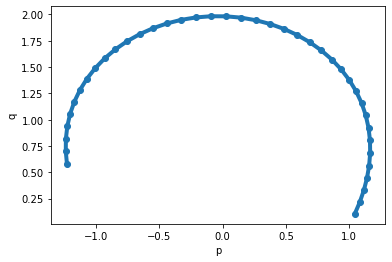

In [10]:
def dV_pendulum(q):
  return -np.cos(q)

def dT_pendulum(p):
  return p


def non_linear_pendulum():
  
  q0 = np.array([0])
  p0 = np.array([1])

  T = 4
  t0 = 0
  h = 0.1
  p, q, t = stormer_verlet(p0, q0, t0, T, h, dV_pendulum, dT_pendulum)

  plt.title("")
  plt.scatter(p,q)
  plt.plot(p[0], q[0],  linewidth=4) 
  plt.xlabel("p")
  plt.ylabel("q")
  plt.plot()

non_linear_pendulum()





**Notes on the Neural Network Implementation**


Let the output of layer $k$ be $Z_k \in  \mathbb{R}^{N \times D_k }$ , where $N$ is the number of input samples and $D_k$ is the number of dimensions of the output. Then is the output of layer $k+1$ defined such that
$$
Z^{(k+1)} = \sigma(  Z^{(k)} W_{k+1} + b_{k+1})
$$
Here is $D_{k+1}$ the dimension of the output (number of nodes), the weight matrix $W_{k+1} \in \mathbb{R}^{ D_{k} \times D_{k+1} } $, the output $Z^{(k+1)} \in  \mathbb{R}^{N \times D_{k+1} }$ and the activation function $\sigma:  \mathbb{R} \mapsto \mathbb{R} $ which applied element wise. Observe that the bias $b_{k+1} \in  \mathbb{R}^{1 \times D_{k+1} } $ is added row wise for all $N$ rows.

The forward propogation in the neural network is constructed by stacking layers. Let us define the input $Z^{0} \in  \mathbb{R}^{ N \times D_0 }$ and output $Z^{(K)}\in  \mathbb{R}^{ N \times 1 } $ for $K$ layers, then is the stacking 

$$
\begin{align*}
Z^{(1)} &= \sigma( Z^{(0)} W_{1} + b_{1}) \\
&\vdots \\
Z^{(k+1)} &= \sigma( Z^{(k)} W_{k+1}  + b_{k+1}) \\
&\vdots \\
Z^{(K)} &= \eta(Z^{(K-1)}  W_{K} + b_{K}). 
\end{align*}
$$

Notice the alternative activation function $\eta:  \mathbb{R} \mapsto \mathbb{R} $ for the $K$-th layer. Also note that the project description is evalutating the case where $N=1$, and therefore use notation $ w  z_{K-1} + \mu$, with the dimensions $w \in \mathbb{R}^{D_{K-1} \times 1} $ and $\mu \in \mathbb{R} $, for the last layer. However, since we work with $N>1$ and the output has to match the requirement $Z^{(K)}\in  \mathbb{R}^{ N \times 1 } $, and therefore will continue using the notation $W_{K} \in \mathbb{R}^{D_{K-1} \times 1} $, and $b_{K} \in \mathbb{R} $ for convenience.







In [58]:
import random as r
import sys


def sigma(x, derivative=False):
  if (derivative):
    return np.sech(x)**2
  return np.tanh(x)

def mu(x, derivative=False):
  if (derivative):
    return (1/4)*np.sech(x/2)**2
  return 0.5*(1 + np.tanh(x*0.5))

"""
Layer

Class containing the low level functionality for a invidual layer.
"""
class Layer:
  """
  Input:
    dim_in: Dimension for input 
    n_nodes: Number of nodes
    activation: activation function.
  """
  def __init__(self, 
               dim_in,
               n_nodes,
               activation):  
    self.W = 2*np.random.random((dim_in, n_nodes)) - 1
    self.b = 2*np.random.random((1, n_nodes)) 
    self.activation = activation

  """
  Computes the output of the layer

  Input: 
    Z: Numpy array of shape (1, dim_in)
    residual: Allow ResNet architecture.
  
  Output: 
    Numpy array of shape (1, dim_out) of computed output from layer.   
  """
  def output(self, Z, residual=False):
    
    if (Z.shape[1]) != (self.W.shape[0]):
      print("Layer: Wrong input dimension of Z: ", Z.shape, " not multiplicable with W: ", self.W.shape)
      sys.exit("Exiting.")
    if (residual):
      return self.activation(np.dot( Z, self.W) + self.b) + Z 
    
    return self.activation(np.dot( Z, self.W) + self.b) 

"""
Neural Net

Class containing the high level functionality combining all layers.
"""
class NN:
  """
  Input:
  dim_in: Dimension of input vector to the neural net.
  dim_out: Dimension of output vector from the neural net.
  K: Number of layers
  L: Number of nodes per layer (same as dim_out in Layer class).
  """
  def __init__(self):
    self.layers = []
   
  """
  Basic function for adding a layer into a class.
  
  Input:
  dim_in: Dimension of input vector to the neural net.
  n_nodes: Number of nodes 
  """
  def add_layer(self, 
                dim_in,
                n_nodes,
                activation):
    self.layers.append(Layer( dim_in, n_nodes, activation))
  
  def forward_prop(self, Z):
    for layer_i in self.layers:
      Z = layer_i.output(Z)
    return Z
  
  
  def grad_j(self, Z, Y):
    r =  np.linalg.norm(self.forward_prop(Z) - Y) 
    
    # Formulate variable vector Theta
    Th = {}

    for k in range(0, len(self.layers)):
      l_i = self.layers[k]
      Th["th_"+str(k)] = np.zeros(( l_i.W.shape[0]*l_i.W.shape[1] +  l_i.b.shape[1], 1))

    return Z
  
"""
FUNCTIONALITY TESTS
"""
def layer_test():

  Z = np.array([ 
              [0,0,1],
              [1,1,1],
              [1,1,4]])
  n_nodes = 1
  l = Layer( dim_in=3, n_nodes=n_nodes, activation=sigma)
  out= l.output(Z)
  
  print("--- LAYER TEST --- \n")
  print("Input ", Z.shape,": \n", Z )
  print("\n n_nodes: ",n_nodes ,"Output:", out.shape, "\n", out)

def forward_prop_test():
  Z = np.array([ 
              [0,0,1],
              [0,1,1],
              [1,1,4]])
  
  net = NN()
  net.add_layer( dim_in=3, n_nodes=3, activation=sigma)
  net.add_layer( dim_in=3, n_nodes=3, activation=sigma)
  net.add_layer( dim_in=3, n_nodes=1, activation=mu)
  F = net.forward_prop(Z)

  print("\n --- NN FORWARD PROPOGATION TEST --- \n")
  print("Input ", Z.shape,": \n", Z )
  print("\nOutput ", F.shape,": \n", F )

def grad_j_test():
  Z = np.array([ 
              [0,0,1],
              [0,1,1],
              [1,1,4]])
  Y = np.array([[ 1,0,1 ]]).T
    
  net = NN()
  net.add_layer( dim_in=3, n_nodes=1, activation=mu)
  F = net.grad_j(Z,Y)
  print("\n --- NN GRAD J TEST --- \n")
  print(F)

layer_test()
forward_prop_test()
grad_j_test()


--- LAYER TEST --- 

Input  (3, 3) : 
 [[0 0 1]
 [1 1 1]
 [1 1 4]]

 n_nodes:  1 Output: (3, 1) 
 [[0.91621444]
 [0.90079931]
 [0.27999439]]

 --- NN FORWARD PROPOGATION TEST --- 

Input  (3, 3) : 
 [[0 0 1]
 [0 1 1]
 [1 1 4]]

Output  (3, 1) : 
 [[0.60511886]
 [0.60998274]
 [0.6535746 ]]

 --- NN GRAD J TEST --- 

[[0 0 1]
 [0 1 1]
 [1 1 4]]
